In [1]:
import pandas as pd 
df21 = pd.read_csv('/content/df_joinedCovidCases.csv')
df21


,Unnamed: 0,CountryName,Date,total_cases,QGDP,StringencyIndex
0,0,Australia,20200220,15,1236051,19.44
1,1,France,20200220,12,2915678,5.56
2,2,Finland,20200220,1,253123,13.89
3,5,Italy,20200220,3,2333068,19.44
4,6,Japan,20200220,95,5250698,25.00
...,...,...,...,...,...,...
234,239,Slovenia,20211218,447794,78485,58.33
235,240,Denmark,20211218,609062,315839,38.89
236,241,Belgium,20211218,1999764,565553,48.15
237,242,Luxembourg,20211218,96108,72630,46.30


In [ ]:
#only Q1-2020 values 
GDPQ12020= df21.loc[df21['Date']==20200611]
GDPQ12020.head()

,Unnamed: 0,CountryName,Date,total_cases,QGDP,StringencyIndex
12,17,Costa Rica,20200611,1538,97911,72.22
13,18,Luxembourg,20200611,4052,68160,41.67
14,19,Lithuania,20200611,1747,99771,50.93
15,20,Latvia,20200611,1094,55025,50.00
16,21,Austria,20200611,17034,454904,50.00


In [ ]:
#only Q1-2021 values 
GDPQ12021= df21.loc[df21['Date']==20210520]
GDPQ12021.head()


,Unnamed: 0,CountryName,Date,total_cases,QGDP,StringencyIndex
152,157,Slovenia,20210520,250811,75929,52.78
153,158,Chile,20210520,1308311,444215,80.09
154,159,United Kingdom,20210520,4459280,2771207,62.50
155,160,Norway,20210520,120797,330822,62.04
156,161,Switzerland,20210520,686152,583187,50.93


In [ ]:
#Top 10 GDP countries 
GDP2020= GDPQ12020.nlargest(10,'QGDP')
GDP2020.clean= GDP2020[["CountryName","QGDP"]]
GDP2020_rename= GDP2020.clean.rename(columns = {'QGDP': 'GDP Q1-2020'})
GDP2020_rename


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,CountryName,GDP Q1-2020
23,United States,19840975
18,Japan,5266778
34,Germany,4104437
19,United Kingdom,2941643
30,France,2749568
39,Turkey,2383512
32,Mexico,2349930
20,Italy,2199622
41,Canada,1711248
36,Spain,1708668


In [ ]:
GDP2021= GDPQ12021.nlargest(10,'QGDP')
GDP2021.clean= GDP2021[["CountryName","QGDP"]]
GDP2021_rename= GDP2021.clean.rename(columns = {'QGDP': 'GDP Q1-2021'})
GDP2021_rename


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,CountryName,GDP Q1-2021
178,United States,19949500
171,Japan,5170259
182,Germany,3982322
166,France,2791880
154,United Kingdom,2771207
157,Turkey,2566230
167,Mexico,2284790
169,Italy,2185937
159,Canada,1715842
163,Spain,1636664


In [ ]:
GDP_merged = pd.merge(GDP2020_rename, GDP2021_rename, how="right", on=["CountryName"])
GDP_merged

,CountryName,GDP Q1-2020,GDP Q1-2021
0,United States,19840975,19949500
1,Japan,5266778,5170259
2,Germany,4104437,3982322
3,France,2749568,2791880
4,United Kingdom,2941643,2771207
5,Turkey,2383512,2566230
6,Mexico,2349930,2284790
7,Italy,2199622,2185937
8,Canada,1711248,1715842
9,Spain,1708668,1636664


In [ ]:
US_stringency= df21[df21["CountryName"] == "United States"]
US_stringency["StringencyIndex"].mean()

55.82142857142857

In [ ]:
Japan_stringency= df21[df21["CountryName"] == "Japan"]
Japan_stringency["StringencyIndex"].mean()

41.137142857142855

In [ ]:
Germany_stringency= df21[df21["CountryName"] == "Germany"]
Germany_stringency["StringencyIndex"].mean()

58.06857142857143

In [ ]:
United_Kingdom_stringency= df21[df21["CountryName"] == "United Kingdom"]
United_Kingdom_stringency["StringencyIndex"].mean()

58.275000000000006

In [ ]:
France_stringency= df21[df21["CountryName"] == "France"]
France_stringency["StringencyIndex"].mean()

56.8875

In [ ]:
Turkey_stringency= df21[df21["CountryName"] == "Turkey"]
Turkey_stringency["StringencyIndex"].mean()

63.580000000000005

In [ ]:
Mexico_stringency= df21[df21["CountryName"] == "Mexico"]
Mexico_stringency["StringencyIndex"].mean()

64.58333333333333

In [ ]:
Italy_stringency= df21[df21["CountryName"] == "Italy"]
Italy_stringency["StringencyIndex"].mean()

62.631428571428565

In [ ]:
Canada_stringency= df21[df21["CountryName"] == "Canada"]
Canada_stringency["StringencyIndex"].mean()

61.24285714285713

In [ ]:
Spain_stringency= df21[df21["CountryName"] == "Spain"]
Spain_stringency["StringencyIndex"].mean()

53.35875

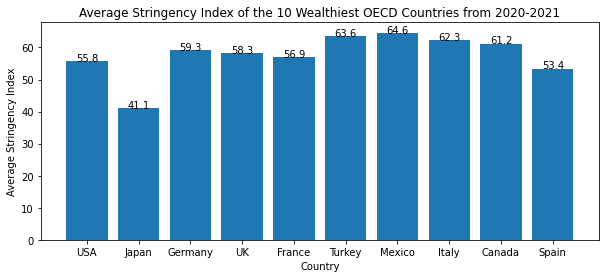

In [ ]:
import matplotlib.pyplot as plt

Country = ['USA','Japan','Germany','UK','France','Turkey','Mexico','Italy','Canada','Spain']
StringencyIndex = [55.8,41.1,59.3,58.3,56.9,63.6,64.6,62.3,61.2,53.4]

plt.figure(figsize=(10,4))
plt.bar(Country, StringencyIndex)
plt.xticks(rotation=0)
plt.xlabel("Country")
plt.ylabel("Average Stringency Index")
plt.title("Average Stringency Index of the 10 Wealthiest OECD Countries from 2020-2021")
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(Country, StringencyIndex)
plt.savefig('stringency.png', dpi=300, bbox_inches='tight')
plt.show()
#ref for adding labels: https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

In [ ]:
#total covid-19 cases 
US_cases= df21[df21["CountryName"] == "United States"]
US_cases_total= US_cases["total_cases"].sum()
US_cases_total 

1.26e+08


In [ ]:
#making the total covid-19 cases value 3sf 
U= [125601037]
for i in U:
  print("{:#.3g}".format(i))


In [ ]:
Japan_cases= df21[df21["CountryName"] == "Japan"]
Japan_cases_total= Japan_cases["total_cases"].sum()
Japan_cases_total 

In [ ]:
J= [2878954]
for i in J:
  print("{:#.3g}".format(i))

In [ ]:
Germany_cases= df21[df21["CountryName"] == "Germany"]
Germany_cases_total= Germany_cases["total_cases"].sum()
Germany_cases_total 

In [ ]:
G= [11764938]
for i in G:
  print("{:#.3g}".format(i))

In [ ]:
UK_cases= df21[df21["CountryName"] == "United Kingdom"]
UK_cases_total= UK_cases["total_cases"].sum()
UK_cases_total 

In [ ]:
UK= [29128569]
for i in UK:
  print("{:#.3g}".format(i))

In [ ]:
France_cases= df21[df21["CountryName"] == "France"]
France_cases_total= France_cases["total_cases"].sum()
France_cases_total 

In [ ]:
F= [27646330]
for i in F:
  print("{:#.3g}".format(i))

In [ ]:
Turkey_cases= df21[df21["CountryName"] == "Turkey"]
Turkey_cases_total= Turkey_cases["total_cases"].sum()
Turkey_cases_total 

In [ ]:
T= [16476677]
for i in T:
  print("{:#.3g}".format(i))

In [ ]:
Mexico_cases= df21[df21["CountryName"] == "Mexico"]
Mexico_cases_total= Mexico_cases["total_cases"].sum()
Mexico_cases_total 

In [ ]:
M= [9815730]
for i in M:
  print("{:#.3g}".format(i))

In [ ]:
Italy_cases= df21[df21["CountryName"] == "Italy"]
Italy_cases_total= Italy_cases["total_cases"].sum()
Italy_cases_total 

1.39e+07


In [ ]:
I= [13858815]
for i in I:
  print("{:#.3g}".format(i))

In [ ]:
Canada_cases= df21[df21["CountryName"] == "Canada"]
Canada_cases_total= Canada_cases["total_cases"].sum()
Canada_cases_total 

4.42e+06


In [ ]:
C= [4417440]
for i in C:
  print("{:#.3g}".format(i))

In [ ]:
Spain_cases= df21[df21["CountryName"] == "Spain"]
Spain_cases_total= Spain_cases["total_cases"].sum()
Spain_cases_total 

1.96e+07


In [ ]:
S= [19644496]
for i in S:
  print("{:#.3g}".format(i))

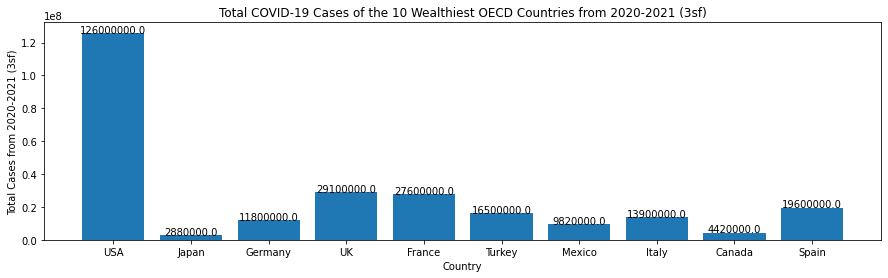

In [ ]:
import matplotlib.pyplot as plt

Country = ['USA','Japan','Germany','UK','France','Turkey','Mexico','Italy','Canada','Spain']
TotalCases = [1.26e+08,2.88e+06,1.18e+07,2.91e+07,2.76e+07,1.65e+07,9.82e+06,1.39e+07,4.42e+06,1.96e+07 ]
plt.figure(figsize=(15,4))
plt.bar(Country, TotalCases)
plt.xticks(rotation=0)
plt.xlabel("Country")
plt.ylabel("Total Cases from 2020-2021 (3sf)")
plt.title("Total COVID-19 Cases of the 10 Wealthiest OECD Countries from 2020-2021 (3sf)")
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(Country, TotalCases)
plt.savefig('cases.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
top_10_OECD= GDP2020_rename[["CountryName"]]
top_10_OECD

,CountryName
23,United States
18,Japan
34,Germany
19,United Kingdom
30,France
39,Turkey
32,Mexico
20,Italy
41,Canada
36,Spain


In [ ]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100
#reference: https://stackoverflow.com/questions/42100058/percentage-difference-between-any-two-columns-of-pandas-dataframe


In [ ]:
GDP_merged['% change'] = percentage_change(GDP_merged['GDP Q1-2020'],GDP_merged['GDP Q1-2021'])
for i in GDP_merged ['% change']:
  print("{:#.3g}".format(i))


0.547
-1.83
-2.98
1.54
-5.79
7.67
-2.77
-0.622
0.268
-4.21


In [ ]:
percentagechange = [0.547,-1.83,-2.98,-5.79,1.54,7.67,-2.77,-0.622,0.268,-4.21]
GDP_merged['Percentage Change(%)'] = percentagechange
GDP_merged



,CountryName,GDP Q1-2020,GDP Q1-2021,Percentage Change(%)
0,United States,19840975,19949500,0.547
1,Japan,5266778,5170259,-1.830
2,Germany,4104437,3982322,-2.980
3,France,2749568,2791880,-5.790
4,United Kingdom,2941643,2771207,1.540
5,Turkey,2383512,2566230,7.670
6,Mexico,2349930,2284790,-2.770
7,Italy,2199622,2185937,-0.622
8,Canada,1711248,1715842,0.268
9,Spain,1708668,1636664,-4.210


In [ ]:
pip install matplotlib


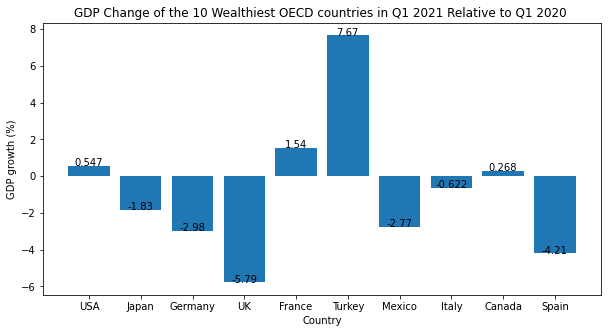

In [ ]:
import matplotlib.pyplot as plt

Country = ['USA','Japan','Germany','UK','France','Turkey','Mexico','Italy','Canada','Spain']
GDPgrowth = [0.547,-1.83,-2.98,-5.79,1.54,7.67,-2.77,-0.622,0.268,-4.21]

plt.figure(figsize=(10,5))
plt.bar(Country, GDPgrowth)
plt.xticks(rotation=0)
plt.xlabel("Country")
plt.ylabel("GDP growth (%)")
plt.title("GDP Change of the 10 Wealthiest OECD countries in Q1 2021 Relative to Q1 2020 ")
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(Country, GDPgrowth)
plt.savefig('GDPchange.png', dpi=300, bbox_inches='tight')
plt.show()

#reference for bar chart:https://datatofish.com/bar-chart-python-matplotlib/
#reference for axis labels: https://www.kite.com/python/docs/matplotlib.pyplot.xlabel
#reference for making the figure size bigger: https://www.pythonpool.com/matplotlib-figsize/
#reference for saving as an image: https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.04-Saving-Plots/

In [ ]:
casessummary= df21[["total_cases"]]. describe()
casessummary

,total_cases
count,2.390000e+02
mean,1.413774e+06
std,4.132501e+06
min,1.000000e+00
25%,3.115100e+04
50%,2.574460e+05
75%,1.092450e+06
max,3.918260e+07


In [ ]:
GDPsummary = df21[["QGDP"]].describe()
GDPsummary

,QGDP
count,2.390000e+02
mean,1.591474e+06
std,3.368228e+06
min,1.731100e+04
25%,2.545890e+05
50%,5.057770e+05
75%,1.709958e+06
max,2.027682e+07


In [ ]:
stringencysummary = df21[["StringencyIndex"]].describe()
stringencysummary

,StringencyIndex
count,239.000000
mean,54.722803
std,17.528859
min,2.780000
25%,43.520000
50%,56.480000
75%,67.590000
max,96.300000


In [ ]:
summary_joined = stringencysummary.merge(GDPsummary, left_index=True, right_index=True)
allsummary_joined= summary_joined.merge(casessummary, left_index=True, right_index=True)
allsummary_joined

,StringencyIndex,QGDP,total_cases
count,239.000000,2.390000e+02,2.390000e+02
mean,54.722803,1.591474e+06,1.413774e+06
std,17.528859,3.368228e+06,4.132501e+06
min,2.780000,1.731100e+04,1.000000e+00
25%,43.520000,2.545890e+05,3.115100e+04
50%,56.480000,5.057770e+05,2.574460e+05
75%,67.590000,1.709958e+06,1.092450e+06
max,96.300000,2.027682e+07,3.918260e+07


In [3]:
import sys
from prettytable import PrettyTable
summarytable = PrettyTable()

summarytable.title = 'Summary Statistics for: Quarterly GDP, Stringency, and Daily COVID-19 Cases Cleaned Datasets with Values from 2019-2021 (3sf)'
summarytable.field_names = ['Summary statistic','Quarterly GDP/US Dollar, Millions, 2015', 'Stringency Index', 'Daily Total Cases']
summarytable.add_row(["Count", "239","239", "239"])
summarytable.add_row(["Mean", "1.59e+06","54.7", "1.41e+06"])
summarytable.add_row(["Standard Deviation","3.37e+06","17.5","4.13e+06" ])
summarytable.add_row(["Min", "1.73e+04", "2.78","1.00"])
summarytable.add_row(["25%", "2.55e+05", "43.5","3.12e+04"])
summarytable.add_row(["50%","5.06e+05", "56.5","2.57e+05" ])
summarytable.add_row(["75%", "1.71e+06","67.6", "1.09e+06"])
summarytable.add_row(["Max", "2.03e+08", "96.3", "3.92e+07" ])

print(summarytable)

#reference for prettytable: https://www.geeksforgeeks.org/creating-tables-with-prettytable-library-python/

+---------------------------------------------------------------------------------------------------------------------------------+
|  Summary Statistics for: Quarterly GDP, Stringency, and Daily COVID-19 Cases Cleaned Datasets with Values from 2019-2021 (3sf)  |
+--------------------------+-----------------------------------------------------+-----------------------+------------------------+
|    Summary statistic     |       Quarterly GDP/US Dollar, Millions, 2015       |    Stringency Index   |   Daily Total Cases    |
+--------------------------+-----------------------------------------------------+-----------------------+------------------------+
|          Count           |                         239                         |          239          |          239           |
|           Mean           |                       1.59e+06                      |          54.7         |        1.41e+06        |
|    Standard Deviation    |                       3.37e+06                 

In [ ]:
pip install tabulate

In [ ]:
GDPST= [2.390000e+02,
1.591474e+06,
3.368228e+06,
1.731100e+04,
2.545890e+05,
5.057770e+05,
1.709958e+06,
2.027682e+07]
for i in GDPST:
    print("{:#.3g}".format(i))


239.
1.59e+06
3.37e+06
1.73e+04
2.55e+05
5.06e+05
1.71e+06
2.03e+07


In [2]:
stringencyST = [239.000000,
54.722803,
17.528859,
2.780000,
43.520000,
56.480000,
67.590000,
96.300000]
for i in stringencyST:
    print("{:#.3g}".format(i))

239.
54.7
17.5
2.78
43.5
56.5
67.6
96.3


In [ ]:
casesST= [2.390000e+02,
1.413774e+06,
4.132501e+06,
1.000000e+00,
3.115100e+04,
2.574460e+05,
1.092450e+06,
3.918260e+07]
for i in casesST: 
  print("{:#.3g}".format(i))

239.
1.41e+06
4.13e+06
1.00
3.12e+04
2.57e+05
1.09e+06
3.92e+07
